# Advanced geospatial plotting 

In [3]:
import pandas as pd
import os
from keplergl import KeplerGl
from pyproj import CRS
import numpy as np
from matplotlib import pyplot as plt
import json

In [2]:
%%capture
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('Data/output/newyork_data.csv')

## Data preprocessing

In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'avgTemp', '_merge', 'value',
       'bike_rides_daily', 'merge_flag', 'trip_duration'],
      dtype='object')

In [6]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avgTemp,_merge,value,bike_rides_daily,merge_flag,trip_duration
0,34BD74D84D320CF5,electric_bike,2021-01-30 17:30:45.544,2022-05-23 06:17:27.131,W 144 St & Adam Clayton Powell Blvd,7932.1,Frederick Douglass Blvd & W 112 St,7631.23,40.820877,-73.939249,40.801694,-73.957145,casual,2021-01-30,NaN,left_only,1,1,both,687646.693117
1,FA436228F4CD7647,classic_bike,2021-02-15 14:11:20.946,2022-08-10 15:01:30.839,Kent Ave & S 11 St,5062.01,Union Ave & Jackson St,5300.06,40.707645,-73.968415,40.716075,-73.952029,casual,2021-02-15,NaN,left_only,1,1,both,779090.164883
2,8AFBCFEE21703C2D,classic_bike,2021-04-30 16:56:21.003,2022-03-08 17:18:57.580,Bedford Ave & Nassau Ave,5550.05,Lorimer St & Broadway,4965.01,40.723117,-73.952123,40.704118,-73.948186,casual,2021-04-30,NaN,left_only,1,1,both,449302.609617
3,BA13AC6CD2C65E88,classic_bike,2021-07-10 14:53:21.751,2022-09-09 21:21:15.210,E Tremont Ave & E 176 St,8356.02,Popham Ave & W 174 St,8348.02,40.847798,-73.901883,40.847746,-73.922079,casual,2021-07-10,NaN,left_only,1,1,both,613827.890983
4,2F298092D779509A,classic_bike,2021-07-22 11:49:56.126,2022-01-21 13:15:37.645,Stanton St & Norfolk St,5445.07,Pier 40 Dock Station,SYS035,40.720747,-73.986274,40.728660,-74.011980,casual,2021-07-22,NaN,left_only,1,1,both,263605.691983


In [7]:
# Create a value column and group by start and end station 
df['value'] = 1
df_group = df.groupby(['start_station_name', 'end_station_name'], as_index=False).agg(
    start_lat = ('start_lat','first'),
    start_lng = ('start_lng','first'),
    end_lat = ('end_lat', 'first'),
    end_lng = ('end_lng', 'first'),
    trips = ('value', 'count')
)

In [8]:
df_group.head()

,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,trips
0,1 Ave & E 110 St,1 Ave & E 110 St,40.792327,-73.9383,40.792327,-73.938300,573
1,1 Ave & E 110 St,1 Ave & E 18 St,40.792327,-73.9383,40.733812,-73.980544,1
2,1 Ave & E 110 St,1 Ave & E 44 St,40.792327,-73.9383,40.750020,-73.969053,5
3,1 Ave & E 110 St,1 Ave & E 62 St,40.792327,-73.9383,40.761227,-73.960940,14
4,1 Ave & E 110 St,1 Ave & E 68 St,40.792327,-73.9383,40.765005,-73.958185,18


In [9]:
df_group.shape

(735093, 7)

### Some exploratory analysis into the trips

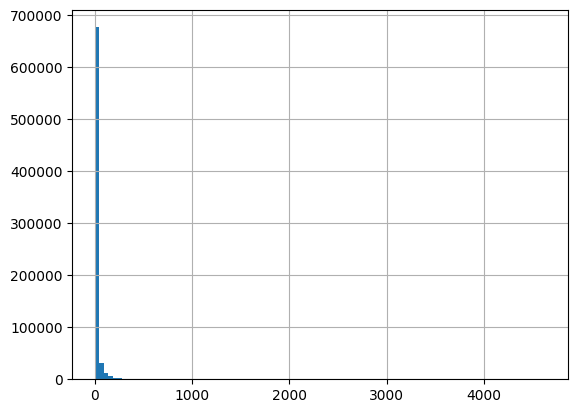

In [10]:
df_group['trips'].hist(bins = 100)
plt.show()

[]

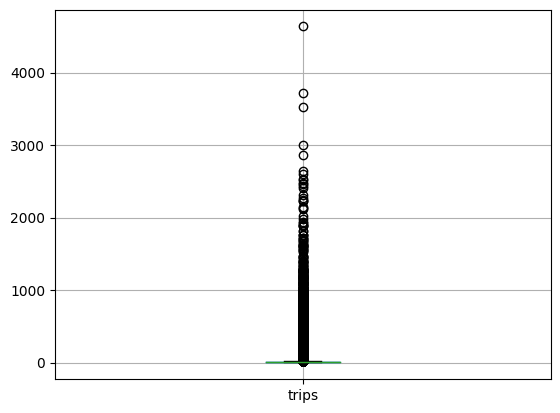

In [11]:
b_plot = df_group.boxplot(column = 'trips') 
b_plot.plot()

In [12]:
df_group['trips'].sort_index().value_counts()

1       228089
2       100560
3        59227
4        40522
5        29992
         ...  
959          1
1102         1
858          1
3525         1
2134         1
Name: trips, Length: 1023, dtype: int64

In [13]:
df_group.to_csv('Data/output/df_groupby_final.csv')

In [4]:
df_group = pd.read_csv('Data/output/df_groupby_final.csv')

## PLot the map

In [ ]:
# Create KeplerGl instance

from keplergl import KeplerGl

# Create a KeplerGl instance and pass the required columns directly
m = KeplerGl(height=700, data={"bike_routes": df_group})


User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


In [ ]:
# df_final.head(1000) for shorter data

#Display map
m

In [85]:
## Before Running the NEXT condes first change the display for the map and RERUN THE SAME CHUNK

In [87]:
config = m.config
config

{'version': 'v1',
 'config': {'visState': {'filters': [{'dataId': ['bike_routes'],
     'id': '9194sr1s8',
     'name': ['trips'],
     'type': 'range',
     'value': [2126, 4637],
     'plotType': 'histogram',
     'animationWindow': 'free',
     'yAxis': None,
     'view': 'side',
     'speed': 1,
     'enabled': True}],
   'layers': [{'id': 'w2lbm5m',
     'type': 'point',
     'config': {'dataId': 'bike_routes',
      'label': 'start',
      'color': [134, 10, 90],
      'highlightColor': [252, 242, 26, 255],
      'columns': {'lat': 'start_lat', 'lng': 'start_lng'},
      'isVisible': True,
      'visConfig': {'radius': 10,
       'fixedRadius': False,
       'opacity': 0.8,
       'outline': False,
       'thickness': 2,
       'strokeColor': None,
       'colorRange': {'name': 'Global Warming',
        'type': 'sequential',
        'category': 'Uber',
        'colors': ['#5A1846',
         '#900C3F',
         '#C70039',
         '#E3611C',
         '#F1920E',
         '#FFC300']

In [ ]:
# saving the json file after the map manual modification
import json
with open("config_new.json", "w") as outfile:
    json.dump(config, outfile)

### First, each line shows a trip between two stations. When you hover over a particular line, it’s easy to decipher which stations are “start” stations and which are “end" stations. It’s also easier to see the “trips(bike_daily_rides)” variable created in the groupby function when the data was preprocessed for plotting. This “trips” variable is the most important aspect of the analysis so far! Lastly, you can change the color palette to show where most of the trips started and where they ended. This makes the map more visually appealing and intuitive to interpret.

In [42]:
m.save_to_html(file_name = 'Bike_Rides.html', read_only = False, config = config)

Map saved to Bike_Rides.html!


## Re-running the map with the saved config file


After saving the `config.json` file, we can read it and re-create the map 

In [41]:
with open("config.json", "r") as infile:
    config = json.load(infile)

m = KeplerGl(height=700, data={"bike_routes": df_group}, config = config)
m

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(config={'version': 'v1', 'config': {'visState': {'filters': [{'dataId': ['bike_routes'], 'id': '9194s…